<a href="https://colab.research.google.com/github/gdsaikrishna/My-Projects/blob/master/Iris_ML_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports and Read File

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded=files.upload()
import io
iris=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris (1).csv


In [ ]:
#Shape , Column Names , Count of Each Species Values

In [ ]:
print(iris.shape)
print(iris.columns)
iris["Species"].value_counts()
iris.info()
iris.head()
iris.describe()

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#plotting with specific column names

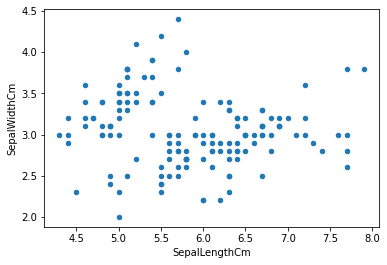

In [ ]:
iris.plot(kind='scatter' , x="SepalLengthCm" , y ="SepalWidthCm")
plt.show()

In [ ]:
#Plotting with given column names and displaying each type of data with legend

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


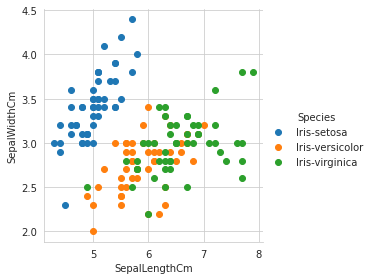

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="Species" , size =4).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
plt.show()

In [ ]:
#showing all pair plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


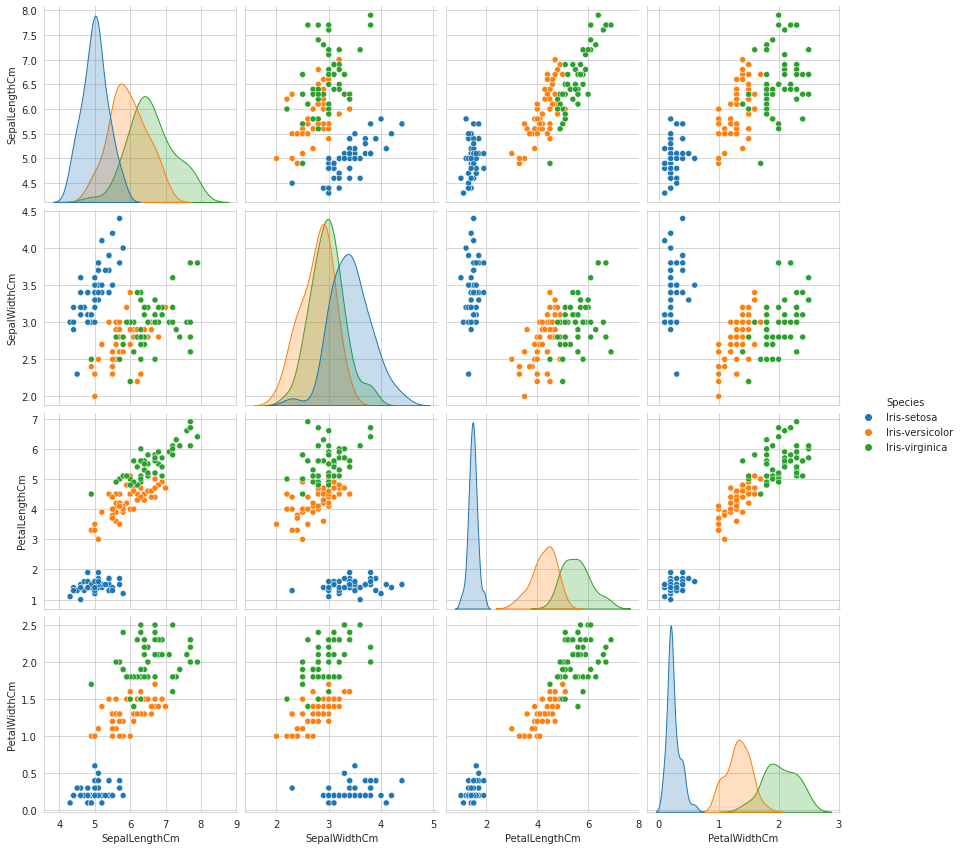

In [ ]:
plt.close()
sns.set_style("whitegrid")
tmp = iris.drop('Id', axis=1)
sns.pairplot(tmp,hue = "Species" , size =3)
plt.show()

In [ ]:
#Violin Plots

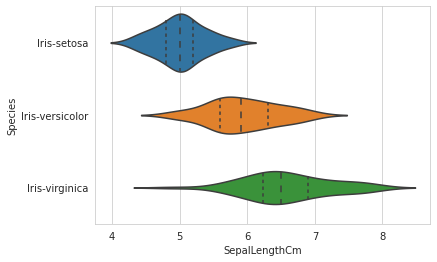

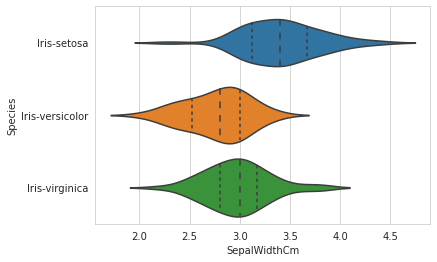

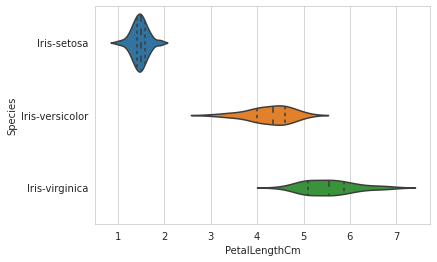

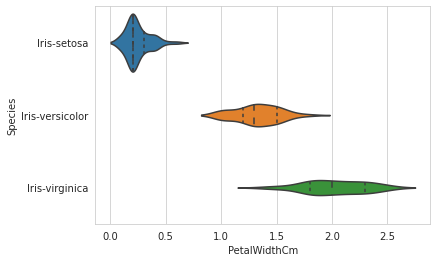

In [ ]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

In [ ]:
#Dividing data into Train and Test

In [ ]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)
(90, 4)
(90,)
(60, 4)
(60,)


In [ ]:
#Getting accuracy for knn and lr  ;experiment with different n-values  : with Full Data 

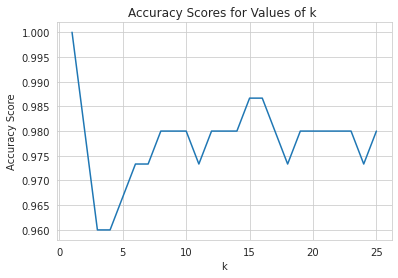

0.9733333333333334


In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k ')
plt.show()
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [ ]:
#Getting accuracy for knn and lr  ;experiment with different n-values  : with Train and Test Data

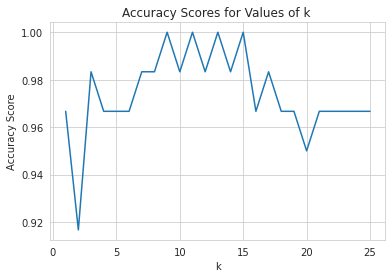

0.9833333333333333


In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k ')
plt.show()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
#predicting with anonymous value

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
print(knn.predict([[4, 1, 2, 5]]))
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.predict([[4, 1, 2, 5]]))
#LogisticRegression().fit(X,y).predict([[5, 4, 2, 5]])

['Iris-versicolor']
LR
['Iris-virginica']
